Model: "model_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_68 (InputLayer)        [(None, 8, 8, 96)]        0         
_________________________________________________________________
conv2d_140 (Conv2D)          (None, 8, 8, 512)         49664     
_________________________________________________________________
conv2d_141 (Conv2D)          (None, 8, 8, 32)          16416     
Total params: 66,080
Trainable params: 66,080
Non-trainable params: 0
_________________________________________________________________
Target:


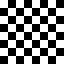

Sample run:


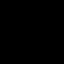

Training...
Stopping due to time-out
Target:


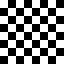

Sample run:


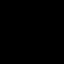


 step: 91, loss: 0.500, log10(loss): -0.301

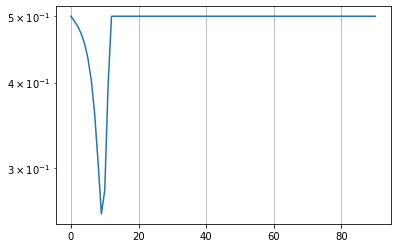

 -- saved parameters
Training...


KeyboardInterrupt: 

In [84]:
import module1
from importlib import reload
reload(module1)

ca = module1.CellularAutomata(
    img_size=8, 
    channel_count=32, 
    layer_counts=[512],
    perception_kernel=module1.sobel_state_kernel())
ca.noise_range = (0, 0) #(-0.1, 0.1)
ca.conserve_mass = False
ca.edge_strategy = module1.EdgeStrategy.MIRROR

lifetime = 16

x0 = lambda: ca.constfilled(0.0)
xf = lambda: ca.imagefilled("checkers.png")
training = module1.init_training(ca, do_load=False, learning_rate=5.0e-4)
training.show_sample_run(x0, xf, lifetime)

while not training.is_done():
    print("Training...")
    training.run(x0, xf, lifetime, max_seconds=5)
    training.show_sample_run(x0, xf, lifetime)
    training.show_loss_history()
    training.save()
    print(" -- saved parameters")